___
# Loading the data and libraries
___

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

while any(marker in os.getcwd() for marker in ['workspace_p2']):
    os.chdir("..")

sys.path.append('classes_and_functions_p2')

current_directory = os.getcwd()
current_directory

'c:\\Users\\barto\\Documents\\Kody\\MachineLearning\\Project2'

In [3]:
# Importing external packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
import statsmodels.api as sm
import random
import umap.umap_ as umap
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from statsmodels.formula.api import ols
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Importing custom-made functions and classes
from classes_and_functions_p2.custom_functions_classes_p2 import (
    DropColumnTransformer,
    LogTransformer,
    corr_matrix_dataframe,
    plot_algo3d,
    plot_algo3d_interactive,
    plot_violin_with_binary_hue,
)

import warnings
warnings.filterwarnings("ignore")

c:\Users\barto\anaconda3\envs\mda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
raw_orders = pd.read_csv('attachments_p2/orders_dataset.csv')
raw_products = pd.read_csv('attachments_p2/products_dataset.csv')
raw_order_reviews = pd.read_csv('attachments_p2/order_reviews_dataset.csv')
raw_order_items = pd.read_csv('attachments_p2/order_items_dataset.csv')

In [5]:
raw_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [6]:
raw_order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [10]:
raw_products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [29]:
raw_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [30]:
print(
    raw_orders.shape,
    raw_order_reviews.shape,
    raw_products.shape,
    raw_order_items.shape,
)

(99441, 8) (99224, 7) (32951, 9) (112650, 7)


---
# ***EDA***
---

## Order Reviews Analysis

In [5]:
raw_order_reviews

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

<Axes: xlabel='review_score', ylabel='count'>

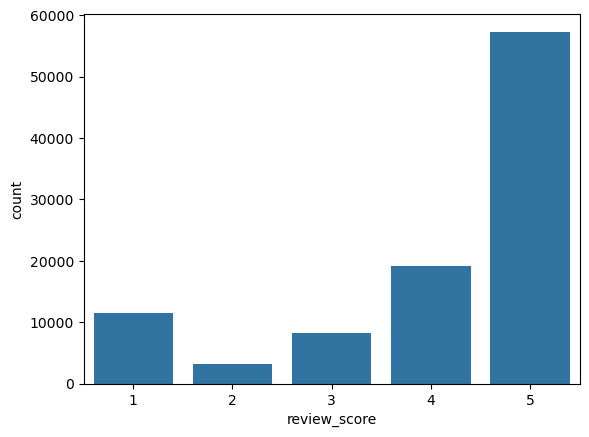

In [5]:
sns.countplot(raw_order_reviews, x = 'review_score')

<Axes: xlabel='review_score', ylabel='count'>

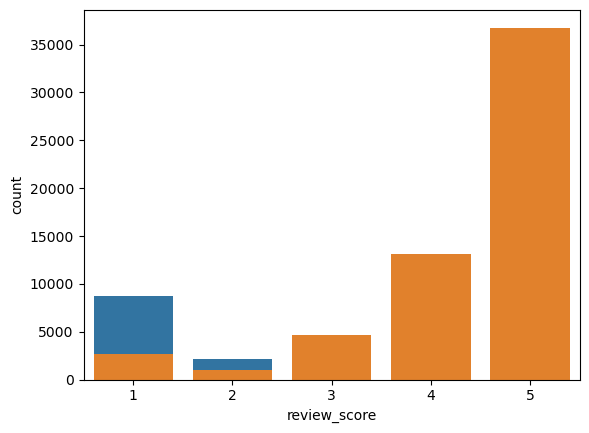

In [27]:
raw_order_reviews_comment = raw_order_reviews[~raw_order_reviews['review_comment_message'].isna()]
raw_order_reviews_no_comment = raw_order_reviews[raw_order_reviews['review_comment_message'].isna()]
sns.countplot(raw_order_reviews_comment, x='review_score')
sns.countplot(raw_order_reviews_no_comment, x='review_score')

 - Orange - people with no comments
 - Blue - people with comments

It seems that people with that were not satified are not likely to give any reviews. 

## Product qualtity for customers

In [6]:
raw_products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [20]:
raw_products_without_nulls = raw_products.dropna()
raw_products_without_nulls

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32340 rows x 9 columns]

In [21]:
raw_products_without_nulls.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [37]:
random_product_id = raw_products.iloc[500, 0]
raw_order_items[raw_order_items['product_id'] == random_product_id]

order_id  order_item_id  \
15044   224a2924f75dd381b65e75fa1e9b98d4              1   
50355   72705672ab6238e6354d9889c34ec409              1   
55969   7f4988e3479541a14ffd638419c902b1              1   
110699  fb8705064d6146e5fdc372b0fc2bf60a              2   

                              product_id                         seller_id  \
15044   2ae501b303a5a8e6f75c8c36f366b2d5  4e06067cc08b3f41d837768d392c3ee3   
50355   2ae501b303a5a8e6f75c8c36f366b2d5  4e06067cc08b3f41d837768d392c3ee3   
55969   2ae501b303a5a8e6f75c8c36f366b2d5  4e06067cc08b3f41d837768d392c3ee3   
110699  2ae501b303a5a8e6f75c8c36f366b2d5  4e06067cc08b3f41d837768d392c3ee3   

        shipping_limit_date  price  freight_value  
15044   2017-12-07 04:39:00  19.99          14.10  
50355   2018-07-11 02:51:03  19.99           7.79  
55969   2017-07-20 15:43:23  19.99          12.48  
110699  2018-05-08 22:30:42  19.99          19.04

---
# ***Dimensionality Reduction***
---

In [26]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(raw_products_without_nulls.iloc[:, 2:])

In [22]:
umapik = umap.UMAP(n_components=3)
umap_data = umapik.fit_transform(raw_products_without_nulls.iloc[:, 2:])

### PCA with KMeans

In [27]:
from sklearn.cluster import KMeans
import pandas as pd

optimal_clusters = 20

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

target_series = pd.Series(cluster_labels)

plot_algo3d_interactive(pca_data, target_series, algo_name='UMAP', target_name='Clusters', dot_size=2)

### UMAP with KMeans

  File "c:\Users\barto\anaconda3\envs\mda\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


The highest silhouette score: 0.39365094900131226 (Optimal clusters: 20)
The lowest Davies-Bouldin score: 0.7960350783515181 (Optimal clusters: 20)
The highest Calinski-Harabasz score: 23314.562455965977 (Optimal clusters: 29)


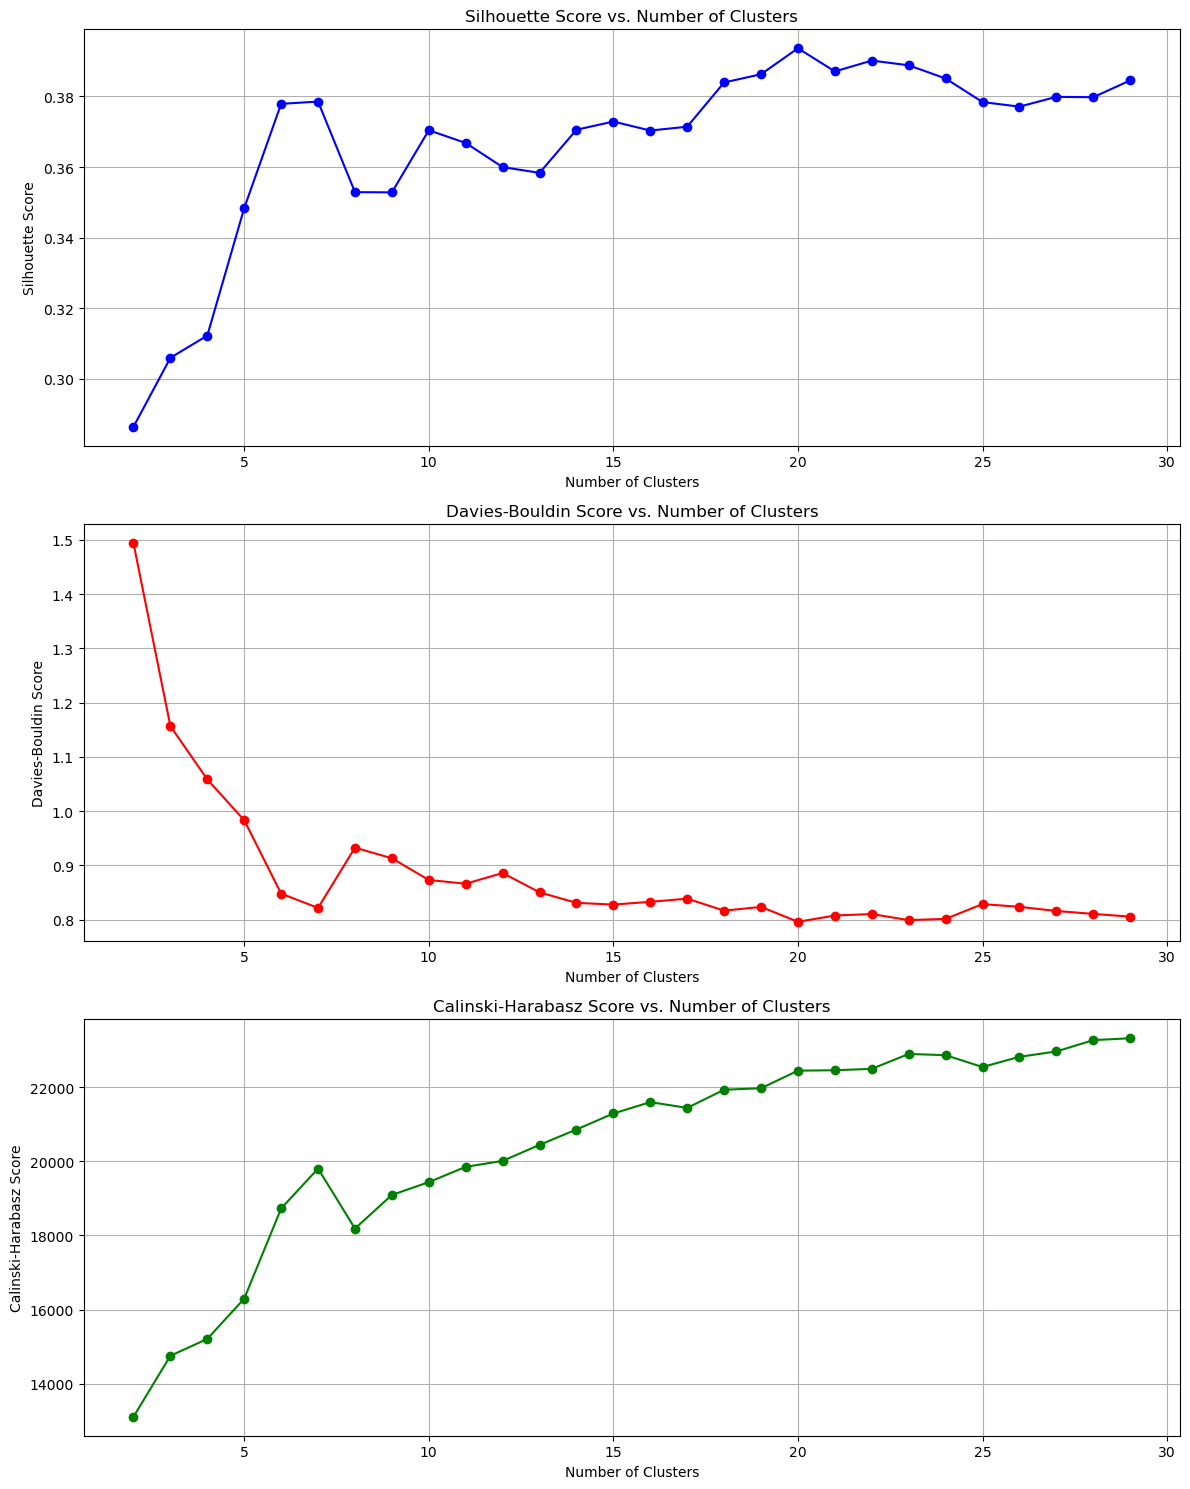

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Initialize lists to store evaluation scores
sil_scores = []
db_scores = []
ch_scores = []

# Define the range of clusters to search
search_range = range(2, 30)

# Iterate through different numbers of clusters
for k in search_range:
    k_means = KMeans(n_clusters=k, random_state=42).fit(umap_data)
    labels = k_means.labels_
    
    # Calculate scores
    sil_scores.append(silhouette_score(umap_data, labels))
    db_scores.append(davies_bouldin_score(umap_data, labels))
    ch_scores.append(calinski_harabasz_score(umap_data, labels))

# Find optimal clusters for each metric
max_sil_score = max(sil_scores)
optimal_clusters_sil = search_range[np.argmax(sil_scores)]

min_db_score = min(db_scores)
optimal_clusters_db = search_range[np.argmin(db_scores)]

max_ch_score = max(ch_scores)
optimal_clusters_ch = search_range[np.argmax(ch_scores)]

print(f"The highest silhouette score: {max_sil_score} (Optimal clusters: {optimal_clusters_sil})")
print(f"The lowest Davies-Bouldin score: {min_db_score} (Optimal clusters: {optimal_clusters_db})")
print(f"The highest Calinski-Harabasz score: {max_ch_score} (Optimal clusters: {optimal_clusters_ch})")

# Plot the scores
plt.figure(figsize=(12, 15))

# Subplot for Silhouette Score
plt.subplot(3, 1, 1)
plt.plot(search_range, sil_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Subplot for Davies-Bouldin Score
plt.subplot(3, 1, 2)
plt.plot(search_range, db_scores, marker='o', linestyle='-', color='r')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)


# Subplot for Calinski-Harabasz Score
plt.subplot(3, 1, 3)
plt.plot(search_range, ch_scores, marker='o', linestyle='-', color='g')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

plt.tight_layout()
plt.show()


In [29]:
from sklearn.cluster import KMeans
import pandas as pd

optimal_clusters = 20

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_data)

target_series = pd.Series(cluster_labels)

plot_algo3d_interactive(umap_data, target_series, algo_name='UMAP', target_name='Clusters', dot_size=2)


In [28]:
umap_data_pd = pd.DataFrame(umap_data, columns=[[f'T-SNE {i}' for i in range(1, 4)]])

umap_data_clusters_pd = pd.concat([umap_data_pd, target_series], axis=1)
umap_data_clusters_pd.columns = ['UMAP 1', 'UMAP 2', 'UMAP 3', 'CLUSTER']
umap_data_clusters_pd

UMAP 1     UMAP 2     UMAP 3  CLUSTER
0       8.533134   8.472445  -4.311804        0
1       6.885271   2.290926  13.169640       13
2       9.166333   7.702558  -6.940808        0
3       8.765541  11.567845   1.774774        0
4      11.085574   8.295379   8.790838       13
...          ...        ...        ...      ...
32335  -0.790061   6.982311   1.825423        7
32336   4.249226  -3.516490   5.232559       17
32337   5.841643  -2.972600   8.300689        5
32338   8.138553   8.200255  10.402060       13
32339   2.865308  -7.566667   4.521290       17

[32340 rows x 4 columns]

### UMAP with Agglomerative CLustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Initialize lists to store evaluation scores
sil_scores = []
db_scores = []
ch_scores = []

# Define the range of clusters to search
search_range = range(2, 30)

# Iterate through different numbers of clusters
for k in search_range:
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = agglo.fit_predict(umap_data)
    
    # Calculate scores
    sil_scores.append(silhouette_score(umap_data, labels))
    db_scores.append(davies_bouldin_score(umap_data, labels))
    ch_scores.append(calinski_harabasz_score(umap_data, labels))

# Find optimal clusters for each metric
max_sil_score = max(sil_scores)
optimal_clusters_sil = search_range[np.argmax(sil_scores)]

min_db_score = min(db_scores)
optimal_clusters_db = search_range[np.argmin(db_scores)]

max_ch_score = max(ch_scores)
optimal_clusters_ch = search_range[np.argmax(ch_scores)]

print(f"The highest silhouette score: {max_sil_score} (Optimal clusters: {optimal_clusters_sil})")
print(f"The lowest Davies-Bouldin score: {min_db_score} (Optimal clusters: {optimal_clusters_db})")
print(f"The highest Calinski-Harabasz score: {max_ch_score} (Optimal clusters: {optimal_clusters_ch})")

# Plot the scores
plt.figure(figsize=(12, 15))

# Subplot for Silhouette Score
plt.subplot(3, 1, 1)
plt.plot(search_range, sil_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Subplot for Davies-Bouldin Score
plt.subplot(3, 1, 2)
plt.plot(search_range, db_scores, marker='o', linestyle='-', color='r')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)

# Subplot for Calinski-Harabasz Score
plt.subplot(3, 1, 3)
plt.plot(search_range, ch_scores, marker='o', linestyle='-', color='g')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

plt.tight_layout()
plt.show()


In [39]:
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglo_clusters = agglo.fit_predict(umap_data)

# Plot clusters
agglo_target = pd.Series(agglo_clusters)

plot_algo3d_interactive(umap_data, agglo_target, 'Agglomerative Clustering', 'Clusters')

# Generate and plot dendrogram (requires SciPy linkage)
linked = linkage(umap_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12.)
plt.title("Dendrogram")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.show()

KeyboardInterrupt: 

---
# ***TDA*** - *Kepler Mapper*
---

### ***T-SNE -> DBSCAN***

In [32]:
# Import the class
import kmapper as km
from sklearn.cluster import DBSCAN

# Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=10)

# Set DBSCAN with custom parameters
clusterer = DBSCAN(eps=20, min_samples=1)

# Create the graph
graph = mapper.map(tsne_data, pca_data, clusterer=clusterer, cover=km.Cover(n_cubes=10, perc_overlap=0.2))

# Visualize
mapper.visualize(graph, path_html=r"kmapper_visualisations\tsne_dbscan.html", title="tsne with dbscan")


KeplerMapper(verbose=10)
Mapping on data shaped (606, 4) using lens shaped (606, 3)

Minimal points in hypercube before clustering: 1
Creating 1000 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
   > Found 1 clusters in hypercube 15.
   > Found 1 clusters in hypercube 16.
   > Found 1 clusters in hypercube 17.
   > Found 1 clusters in hypercube 18.
   > Found 1 clusters in hypercube 19.
   > Found 1 clusters in hypercube 20.
   > Found 1 clusters in hyperc

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>tsne with dbscan | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-we

### ***UMAP -> KMeans***

In [59]:
# Import the class
import kmapper as km
from sklearn.cluster import KMeans

# pca = umap.UMAP(n_components=4)  # Adjust as needed
# pca_data = pca.fit_transform(log_data[numeric_columns])

# Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=10)

# Set DBSCAN with custom parameters
clusterer = KMeans(n_clusters=2)

# Create the graph
graph = mapper.map(umap_data, log_data[numeric_columns], clusterer=clusterer, cover=km.Cover(n_cubes=15, perc_overlap=0.25))

# Visualize
mapper.visualize(graph, path_html=r"kmapper_visualisations\umap_kmeans.html", title="umap with kmeans")

KeplerMapper(verbose=10)
Mapping on data shaped (606, 20530) using lens shaped (606, 3)

Minimal points in hypercube before clustering: 2
Creating 3375 hypercubes.
Cube_0 is empty.

   > Found 2 clusters in hypercube 1.
Cube_2 is empty.

   > Found 2 clusters in hypercube 3.
   > Found 2 clusters in hypercube 4.
   > Found 2 clusters in hypercube 5.
Cube_6 is empty.

Cube_7 is empty.

   > Found 2 clusters in hypercube 8.
   > Found 2 clusters in hypercube 9.
   > Found 2 clusters in hypercube 10.
   > Found 2 clusters in hypercube 11.
   > Found 2 clusters in hypercube 12.
Cube_13 is empty.

Cube_14 is empty.

   > Found 2 clusters in hypercube 15.
   > Found 2 clusters in hypercube 16.
   > Found 2 clusters in hypercube 17.
   > Found 2 clusters in hypercube 18.
   > Found 2 clusters in hypercube 19.
   > Found 2 clusters in hypercube 20.
   > Found 2 clusters in hypercube 21.
   > Found 2 clusters in hypercube 22.
   > Found 2 clusters in hypercube 23.
   > Found 2 clusters in hyper

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>umap with kmeans | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-we

In [16]:
# Import the class
import kmapper as km
from sklearn.cluster import DBSCAN

pca = PCA(n_components=4)  # Adjust as needed
pca_data = pca.fit_transform(log_data[numeric_columns])

# Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=10)

# Set DBSCAN with custom parameters
clusterer = DBSCAN(eps=20, min_samples=1)

# Create the graph
graph = mapper.map(pca_data, log_data[numeric_columns], clusterer=clusterer, cover=km.Cover(n_cubes=5, perc_overlap=0.3))

# Visualize
mapper.visualize(graph, path_html="kmapper_visualisations\dbscan_keplermapper_output.html", title="log_data")

KeplerMapper(verbose=10)
Mapping on data shaped (606, 20530) using lens shaped (606, 4)

Minimal points in hypercube before clustering: 1
Creating 625 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 2 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
   > Found 2 clusters in hypercube 15.
   > Found 1 clusters in hypercube 16.
   > Found 2 clusters in hypercube 17.
   > Found 1 clusters in hypercube 18.
   > Found 1 clusters in hypercube 19.
   > Found 1 clusters in hypercube 20.
   > Found 1 clusters in hyp

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>log_data | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 70